# Measurement Plots

# 1. One arccos call

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cmaps
import math

In [109]:
df = pd.read_csv("perf_test_cuda_257136.csv")

## time vs number of streams

[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]


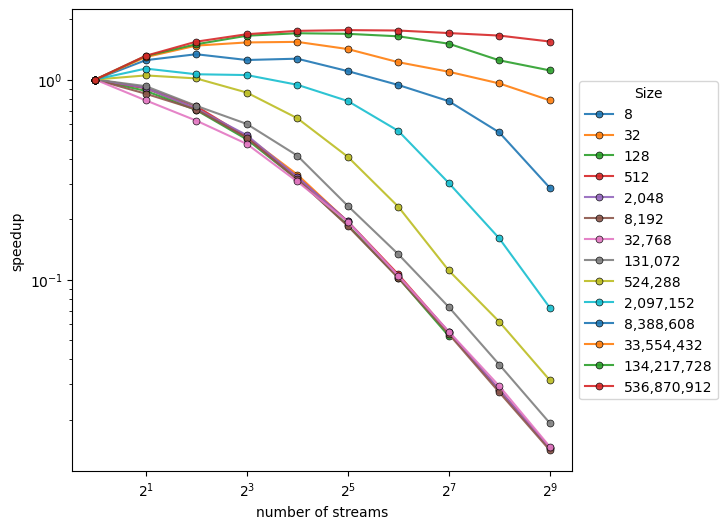

In [110]:
sizes = df['Size'].unique()
print(sizes)
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    sub_df = df[df['Size'] == size]
    times = np.array(sub_df['Time'])
    improvement = times[0] / times
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{size:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

Learnings:

    1. for size <= 131072 (2^19) no runtime improvement by using streams
    2. The optimal chunk size depends on the array size
    3. Larger array sizes achieve larger improvements
    
    (4.) By increasing the array size we increase both computation and memory -> plotting it vs time doesnt give us valuable information -> we plot time vs num_streams for multiple sizes

In [52]:
math.log2(8388608)
2**23
math.log2(2097152)
2**21
math.log2(16777216)
2**24

16777216

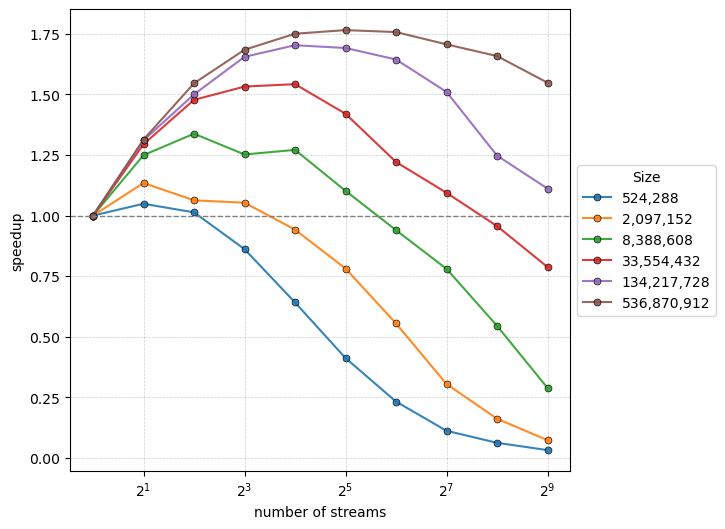

In [68]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    if size > 131072:
        sub_df = df[df['Size'] == size]
        times = np.array(sub_df['Time'])
        improvement = times[0] / times
#         plt.scatter(sub_df['NUM_STREAMS'], improvement,
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
        #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#         plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
        plt.plot(sub_df['NUM_STREAMS'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{size:,}')
    
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.savefig('cuda_scaling.pdf', bbox_inches='tight')
plt.show()

for 524288/2^19 and  only 2 streams are beneficial


In [8]:
math.log2(524288)
math.log2(536870912)

29.0

In [46]:
size = 536870912
print("results for size = ", size)
print()

sub_df = df[df['Size'] == size]
times = np.array(sub_df['Time'])

for idx in range(len(numstreams)):
    improvement = times[0] / times[idx]
    print(numstreams[idx], " streams, chunksize = ", size / numstreams[idx])
    print("----- speedup ------", improvement)
    print()


results for size =  536870912

1  streams, chunksize =  536870912.0
----- speedup ------ 1.0

2  streams, chunksize =  268435456.0
----- speedup ------ 1.313803005322415

4  streams, chunksize =  134217728.0
----- speedup ------ 1.5461774527831933

8  streams, chunksize =  67108864.0
----- speedup ------ 1.6846019833824712

16  streams, chunksize =  33554432.0
----- speedup ------ 1.7508879448429555

32  streams, chunksize =  16777216.0
----- speedup ------ 1.7657056571970362

64  streams, chunksize =  8388608.0
----- speedup ------ 1.757620246085011

128  streams, chunksize =  4194304.0
----- speedup ------ 1.706881568584852

256  streams, chunksize =  2097152.0
----- speedup ------ 1.6586398902200876

512  streams, chunksize =  1048576.0
----- speedup ------ 1.5485822166512164



max speedup reached for size = 2^29, num_streams = 32: speedup = 1.7657

## time vs array size

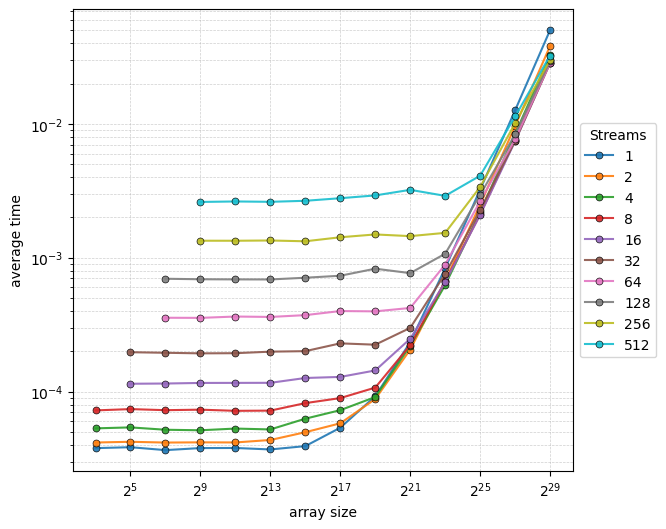

In [49]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['Size'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{size:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

1. using streams is only beneficial for big array sizes
   otherwise too much stream overhead

übersichtlicher:

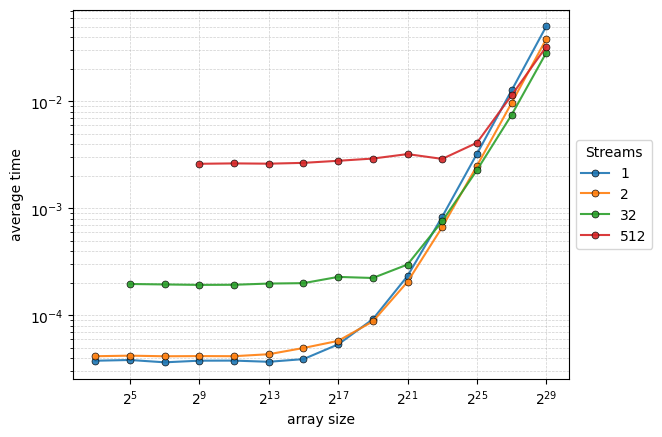

In [53]:
streams = [1, 2, 32, 512]
for i in streams:
    sub_df = df[df['NUM_STREAMS'] == i]
    plt.plot(sub_df['Size'], sub_df['Time'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{i:,}')
    
plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')


## time per value vs array size

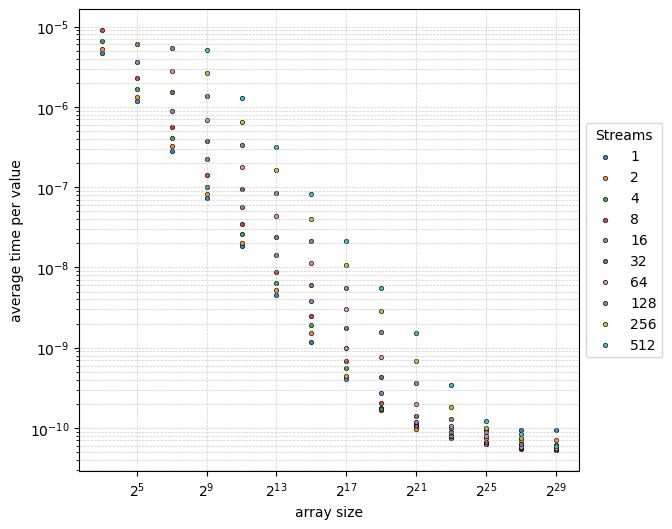

In [11]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
#plt.yscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

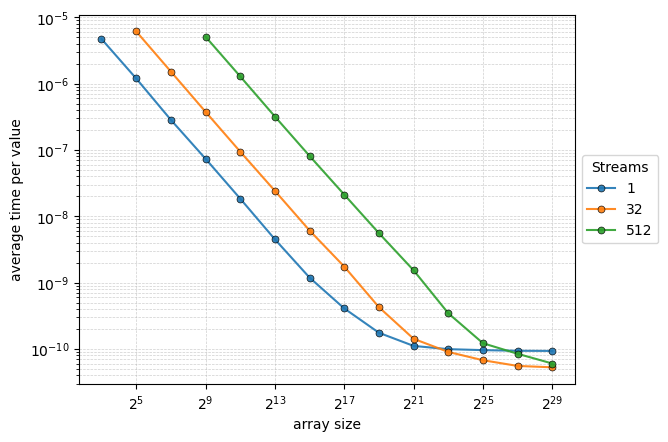

In [58]:
sub_df = df[df['NUM_STREAMS'] == 1]
plt.plot(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{1:,}')
sub_df = df[df['NUM_STREAMS'] == 32]
plt.plot(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{32:,}')
sub_df = df[df['NUM_STREAMS'] == 512]
plt.plot(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{512:,}')

plt.xscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)


# 2. Multiple arccos calls

In [112]:
df_multi = pd.read_csv("perf_test_cuda_258768.csv")

In [113]:
numcalls = df_multi["Num_Repetitions"].unique()
print(numcalls)

sizes = df_multi["Size"].unique()
print(sizes)

numstreams = df_multi["Num_Streams"].unique()
print(numstreams)


[  1   2   4   8  16  32  64 128 256 512]
[        8        32       128       512      2048      8192     32768
    131072    524288   2097152   8388608  33554432 134217728 536870912]
[  1   2   4   8  16  32  64 128 256 512]


## speedup vs streams 

[  1   2   4   8  16  32  64 128 256 512]


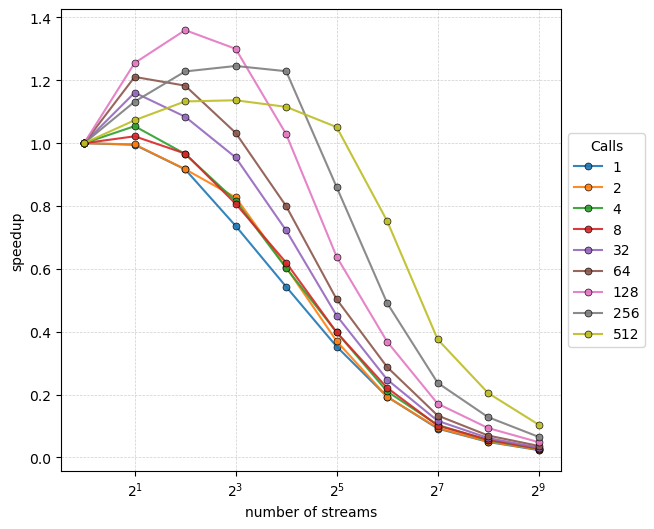

In [114]:
plt.figure(figsize=(8, 6))
print(numcalls)

size = 524288 #134217728

for idx, call in enumerate(numcalls):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Num_Repetitions'] == call) ]
#         plt.scatter(sub_df['Num_Streams'], sub_df['Time'],
#                 label=f'{call:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
        
        if sub_df.empty:
            print(f"Warning: No data for size={size} and Num_Repetitions={call}")
            continue  # Skip this iteration

        times = np.array(sub_df['Time'])
        improvement = times[0] / times
        plt.plot(sub_df['Num_Streams'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{call:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Calls')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.savefig('cuda_scaling.pdf', bbox_inches='tight')
plt.show()

## runtime vs streams 

not very important: runtimes

[  1   2   4   8  16  32  64 128 256 512]


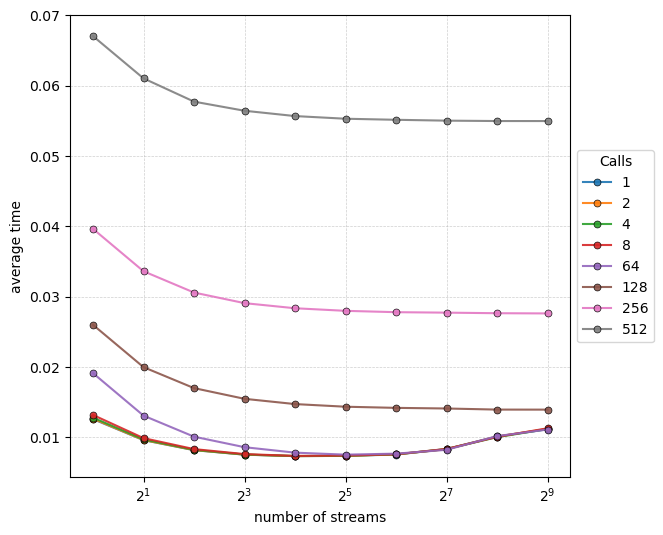

In [78]:
plt.figure(figsize=(8, 6))
print(numcalls)

size = 134217728

for idx, call in enumerate(numcalls):
        sub_df = df_multi[(df_multi['Size'] == size) & (df_multi['Num_Repetitions'] == call) ]
#         plt.scatter(sub_df['Num_Streams'], sub_df['Time'],
#                 label=f'{call:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
        
        if sub_df.empty:
            print(f"Warning: No data for size={size} and Num_Repetitions={call}")
            continue  # Skip this iteration

        times = np.array(sub_df['Time'])
        improvement = times[0] / times
        plt.plot(sub_df['Num_Streams'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{call:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Calls')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.savefig('cuda_scaling.pdf', bbox_inches='tight')
plt.show()


# 3. Stencil

In [88]:
df_stencil = pd.read_csv("stencil_gpu_scaling_265180.csv")
df_stencil.head()

,ranks,nx,ny,nz,num_iter,time,streams
0,###1,8,8,64,32,0.006015,1
1,###1,8,8,64,32,0.005142,2
2,###1,8,8,64,32,0.004651,4
3,###1,8,8,64,32,0.004506,8
4,###1,8,8,64,32,0.005080,16


In [95]:
nz = df_stencil["nz"].unique()
print(nz)

timesteps = df_stencil["num_iter"].unique()
print(timesteps)

numstreams = df_stencil["streams"].unique()
print(numstreams)

gridx = df_stencil["nx"].unique()
print(gridx)

[64]
[  32   64  128  256  512 1024]
[  1   2   4   8  16  32  64 128 256]
[   8   16   32   64  128  256  512 1024 2048 4096]


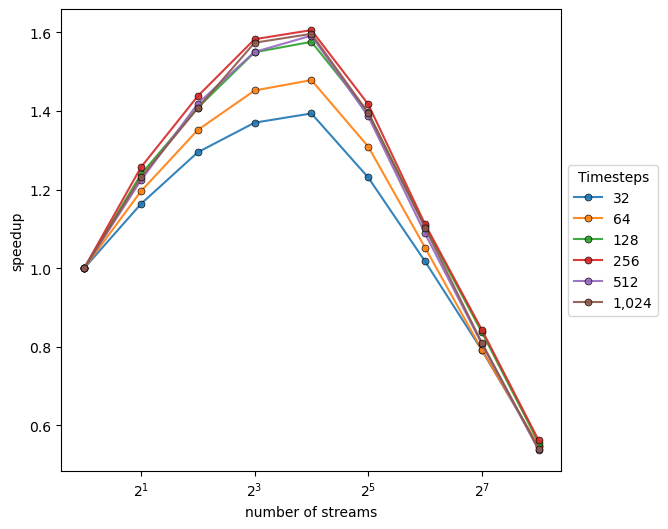

In [107]:
numstreams = df_stencil['streams'].unique()

nx = 256 #512 #128
ny = 256 #512 #128

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == ny)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['streams'], improvement,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Timesteps')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()

For grid 128 x 128 x 64:
1. best speedup for 128 timesteps (~ 1.4)
2. for all timesteps 8 streams show best speedup

better speedups for nx = ny = 256 and 512 -> up to 1.6

low speedup for nx = ny = 1024

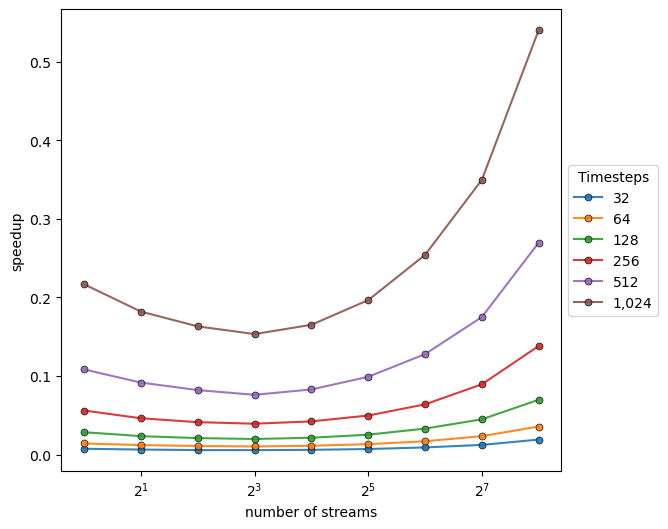

In [105]:
numstreams = df_stencil['streams'].unique()

nx = 128
ny = 128

plt.figure(figsize=(8, 6)) 

for idx, tsteps in enumerate(timesteps):
    sub_df = df_stencil[(df_stencil['num_iter'] == tsteps) & (df_stencil['nx'] == nx) & (df_stencil['ny'] == ny)]
    times = np.array(sub_df['time'])
    improvement = times[0] / times
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
#     plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
#                 label=f'{size:,}',  # Adds thousands separators
#                 s=10,  # Larger dots
#                 alpha=0.9,  # Slight transparency
#                 edgecolor='black', linewidth=0.5)
    plt.plot(sub_df['streams'], times,
                 marker='o',                # Dots
                 markersize=5,              # Similar to s=10 in scatter
                 alpha=0.9,                 # Transparency
                 markeredgecolor='black',  # Edge color
                 markeredgewidth=0.5,      # Edge thickness
                 label=f'{tsteps:,}')

plt.xscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('number of streams')
plt.ylabel('speedup')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Timesteps')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)
plt.show()